In [158]:
%load_ext autoreload
%autoreload 2
import gen_data

import numpy as np
import pandas as pd
import gen_data
import regex as re
import seaborn as sns

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [159]:
industries = pd.read_csv('IndustryByState_2005-2021.csv').drop(columns=['GeoFips','LineCode'])
industries.loc[:,'Description'] = industries.loc[:,'Description'].apply(lambda x: x.strip())
industries = industries.set_index(['GeoName', 'Description']).mean(axis=1).reset_index('Description')
industries = industries.pivot(columns='Description',values=0)
industries.columns = industries.columns.to_list()
industries.index.rename('State', inplace=True)
industries = industries[['Information']].rename(columns = {'Information':'GDPcont_t0'})

spat = {"New England" : ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont'],
 "Mideast" : ['Delaware','District of Columbia','Maryland', 'New Jersey', 'New York', 'Pennsylvania'],
 "Great Lakes" : ['Illinois','Indiana','Michigan','Ohio','Wisconsin'],
 "Plains" : ['Iowa','Kansas','Minnesota','Missouri','Nebraska','North Dakota', 'South Dakota'],
 "Southeast" : ['Alabama', 'Alabama', 'Arkansas', 'Florida','Georgia', 'Kentucky','Louisiana','Mississippi','North Carolina','South Carolina','Tennessee','Virginia','West Virginia'],
 "Southwest" : ['Arizona','New Mexico','Oklahoma','Texas'],
 "Rocky Mountain" : ['Colorado', 'Idaho', 'Montana', 'Utah', 'Wyoming'],
 "Far West" : ['Alaska', 'California','Hawaii','Nevada','Oregon','Washington']}
spat_inv = {}
for region, states in spat.items():
    sub_dict = {state : region for state in states}
    spat_inv.update(sub_dict)
spat_inv

regions = industries.reset_index('State')['State'].apply(lambda x: spat_inv[x])
regions.index = industries.index
industries.loc[:,'Region'] = regions
industries.to_csv('IndustriesTechClean.csv')
industries.sort_values('GDPcont_t0', ascending=False)

,GDPcont_t0,Region
State,,
Washington,0.947419,Far West
California,0.709355,Far West
New York,0.465806,Mideast
Pennsylvania,0.418226,Mideast
Georgia,0.370968,Southeast
Connecticut,0.313871,New England
Utah,0.310000,Rocky Mountain
Colorado,0.268387,Rocky Mountain
Massachusetts,0.259516,New England


In [160]:
industries

,GDPcont_t0,Region
State,,
Alabama,0.039194,Southeast
Alaska,0.120000,Far West
Arizona,0.231129,Southwest
Arkansas,0.047581,Southeast
California,0.709355,Far West
Colorado,0.268387,Rocky Mountain
Connecticut,0.313871,New England
Delaware,0.070968,Mideast
District of Columbia,0.135484,Mideast


In [161]:
states = industries.reset_index().reset_index().rename(columns={'index':'state_int'})
regions = pd.DataFrame(pd.unique(industries.Region)).reset_index().rename(columns={'index':'region_int',0:'Region'})
loc_map = states.merge(regions, on = 'Region')
loc_map

,state_int,State,GDPcont_t0,Region,region_int
0,0,Alabama,0.039194,Southeast,0
1,3,Arkansas,0.047581,Southeast,0
2,9,Florida,0.192097,Southeast,0
3,10,Georgia,0.370968,Southeast,0
4,17,Kentucky,0.115323,Southeast,0
5,18,Louisiana,0.071774,Southeast,0
6,24,Mississippi,0.090161,Southeast,0
7,33,North Carolina,0.201129,Southeast,0
8,40,South Carolina,0.163548,Southeast,0
9,42,Tennessee,0.145323,Southeast,0


In [162]:
state_mat = loc_map[['state_int', 'region_int', 'GDPcont_t0']].to_numpy()
state_mat

array([[ 0.00000000e+00,  0.00000000e+00,  3.91935484e-02],
       [ 3.00000000e+00,  0.00000000e+00,  4.75806452e-02],
       [ 9.00000000e+00,  0.00000000e+00,  1.92096774e-01],
       [ 1.00000000e+01,  0.00000000e+00,  3.70967742e-01],
       [ 1.70000000e+01,  0.00000000e+00,  1.15322581e-01],
       [ 1.80000000e+01,  0.00000000e+00,  7.17741935e-02],
       [ 2.40000000e+01,  0.00000000e+00,  9.01612903e-02],
       [ 3.30000000e+01,  0.00000000e+00,  2.01129032e-01],
       [ 4.00000000e+01,  0.00000000e+00,  1.63548387e-01],
       [ 4.20000000e+01,  0.00000000e+00,  1.45322581e-01],
       [ 4.60000000e+01,  0.00000000e+00,  1.55483871e-01],
       [ 4.80000000e+01,  0.00000000e+00,  7.19354839e-02],
       [ 1.00000000e+00,  1.00000000e+00,  1.20000000e-01],
       [ 4.00000000e+00,  1.00000000e+00,  7.09354839e-01],
       [ 1.10000000e+01,  1.00000000e+00,  9.80645161e-02],
       [ 2.80000000e+01,  1.00000000e+00,  2.10806452e-01],
       [ 3.70000000e+01,  1.00000000e+00

In [302]:
treat = gen_data.init_sim(state_mat, 4, 2, (2,0), (10, 0))
pd.DataFrame(treat)

,0,1,2,3,4,5
0,20.0,2.0,0.093548,NaN,NaN,10.0
1,13.0,1.0,0.709355,1.0,2.0,10.0
2,1.0,0.0,0.047581,NaN,NaN,10.0
3,32.0,4.0,0.094516,1.0,2.0,10.0


In [303]:
simLong = gen_data.run_sim(treat, 4, (.3, .001), .2, .001, 0)

In [304]:
simLong_df = pd.DataFrame(simLong, columns=['state_int','t', 'stateControls_t', 'GDPcont_t'])
simLong_df = simLong_df.merge(loc_map, on = 'state_int')

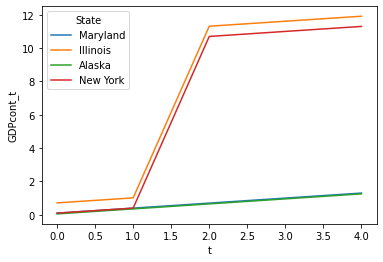

In [305]:
ax = sns.lineplot(data= simLong_df, x = 't', y = 'GDPcont_t', hue = 'State')
# ax.get_legend().remove()

In [314]:
import fit_model
init_mat = treat
# lm, data, baseline = fit_model.fit_TWFE(data=simLong,
#                                         treatment_years=treatment,
#                                         target = 'GDPcont_t',
#                                         linear_time=False,
#                                         treat_dummy_type='time_variant')
tst = fit_model.fit_TWFE(sim_mat, init_mat, linear_time=False, treat_dummy_type='time_variant')

In [317]:
tst.sum(axis= 1)

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 3., 4., 3., 4., 3., 4., 3.,
       4., 3., 4.])

In [324]:
to_include = np.where(time_sparse.sum(axis = 1) != 0)[0]
time_sparse[to_include]


NameError: name 'data_out' is not defined

In [292]:
init_mat[:,4:]

array([[nan, 10.],
       [25., 10.],
       [25., 10.],
       [nan, 10.],
       [nan, 10.],
       [nan, 10.],
       [25., 10.],
       [25., 10.],
       [nan, 10.],
       [25., 10.]])

In [288]:
np.tile(init_mat[:,4], 4 + 1)

array([nan, 25., 25., nan, nan, nan, 25., 25., nan, 25., nan, 25., 25.,
       nan, nan, nan, 25., 25., nan, 25., nan, 25., 25., nan, nan, nan,
       25., 25., nan, 25., nan, 25., 25., nan, nan, nan, 25., 25., nan,
       25., nan, 25., 25., nan, nan, nan, 25., 25., nan, 25.])

In [290]:
time_sparse

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [28]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              GDPcont_t   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.767e+05
Date:                Tue, 07 Dec 2021   Prob (F-statistic):          1.33e-201
Time:                        16:45:41   Log-Likelihood:                 647.22
No. Observations:                 110   AIC:                            -1242.
Df Residuals:                      84   BIC:                            -1172.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0389      0.000    115.047      0.000       0.038       0.040
state_Arkansas           0.0096      0.000     29.148      0.000       0.009       0.010
state_California         0.6704      0.000   1831.576      0.000       0.670       0.671
state_Colorado           0.2295      0.000    626.859      0.000       0.229       0.230
state_Indiana            0.0248      0.000     75.416      0.000       0.024       0.025
state_Kansas            -0.0533      0.000   -162.145      0.000      -0.054      -0.053
state_Michigan           0.0593      0.000    161.982      0.000       0.059       0.060
state_Mississippi        0.0512      0.000    139.950      0.000       0.050       0.052
state_North Carolina     0.1622      0.000    443.112      0.000       0.161       0.163
state_Tennessee          0.1072      0.000    325.991      0.000       0.107       0.108
t_1                      0.0171      0.000     49.497      0.000       0.016       0.018
t_2                      0.0286      0.000     83.047      0.000       0.028       0.029
t_3                      0.0680      0.000    197.270      0.000       0.067       0.069
t_4                      0.0874      0.000    253.439      0.000       0.087       0.088
t_5                      0.1047      0.000    239.999      0.000       0.104       0.106
t_6                      0.1230      0.000    282.106      0.000       0.122       0.124
t_7                      0.1344      0.000    308.250      0.000       0.134       0.135
t_8                      0.1588      0.000    364.063      0.000       0.158       0.160
t_9                      0.1741      0.000    399.189      0.000       0.173       0.175
t_10                     0.1870      0.000    428.767      0.000       0.186       0.188
d_5                      0.3001      0.001    561.970      0.000       0.299       0.301
d_6                      0.3001      0.001    561.970      0.000       0.299       0.301
d_7                      0.3001      0.001    561.970      0.000       0.299       0.301
d_8                      0.3001      0.001    561.970      0.000       0.299       0.301
d_9                      0.3001      0.001    561.970      0.000       0.299       0.301
d_10                     0.3001      0.001    561.970      0.000       0.299       0.301
==============================================================================
Omnibus:                       10.545   Durbin-Watson:                   2.791
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               22.342
Skew:                           0.260   Prob(JB):                     1.41e-05
Kurtosis:                       5.146   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors 

In [105]:
baseline

['state_Colorado']